In [1]:
import scipy.io as scio
import h5py
import tifffile as tf
from PIL import Image

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import networkx as nx
from networkx.algorithms import community
import powerlaw

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import entropy
from scipy.stats import ks_2samp
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import wilcoxon
from itertools import chain
from statsmodels.stats.multitest import multipletests

## Settings and Parameters

In [19]:
region_names = {64: 'MBPED',65: 'MBVL',66: 'MBML',55: 'LH',72: 'SLP',73: 'SIP',74: 'SMP',63: 'CRE',84: 'SCL',59: 'ICL',
                4: 'NO',23: 'EB',26: 'FB',56: 'LAL',79: 'AOTU',75: 'AVLP',76: 'PVLP',77: 'IVLP',60: 'VES',80: 'GOR',82: 'SPS',
                85: 'EPA',67: 'FLA'}
region_name_ids = {}
for k,v in region_names.items():
    region_name_ids[v] = k
print("region_names:", len(region_names), "region_name_ids:", len(region_name_ids))

focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]

## path
path ="xxxx/data_analysis_res_revision/"
print("path:", path)

region_names: 23 region_name_ids: 23
path: xxxx/data_analysis_res_revision/


# 1. Functional connectivity matrix

## 1) Figure 2-f

calc_data: (23, 23)
calc_names: ['ICL', 'SCL', 'MBPED', 'MBML', 'CRE', 'FB', 'EB', 'SMP', 'MBVL', 'SIP', 'AOTU', 'SLP', 'LH', 'NO', 'SPS', 'EPA', 'VES', 'LAL', 'AVLP', 'PVLP', 'IVLP', 'FLA', 'GOR']


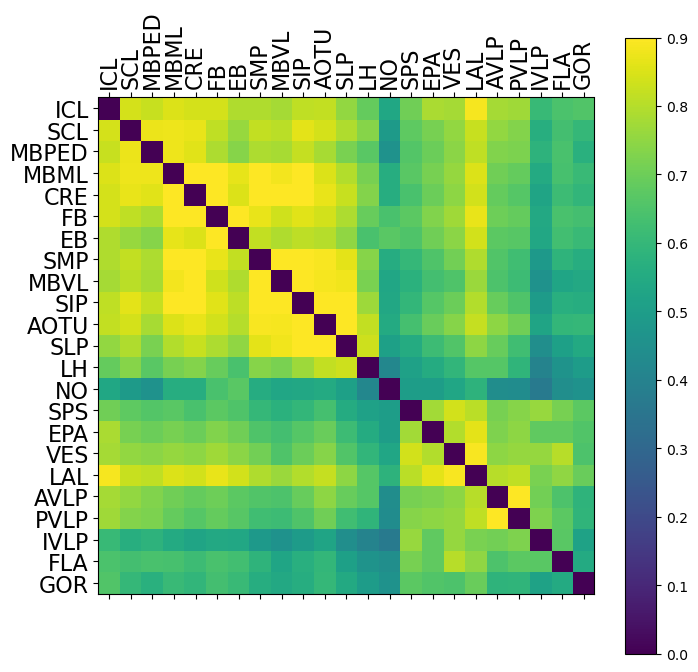

ach_data: (23, 23)
ach_names: ['MBPED', 'MBVL', 'SIP', 'AOTU', 'SLP', 'SCL', 'SMP', 'MBML', 'CRE', 'FB', 'EB', 'LH', 'ICL', 'NO', 'SPS', 'VES', 'LAL', 'AVLP', 'PVLP', 'EPA', 'IVLP', 'GOR', 'FLA']


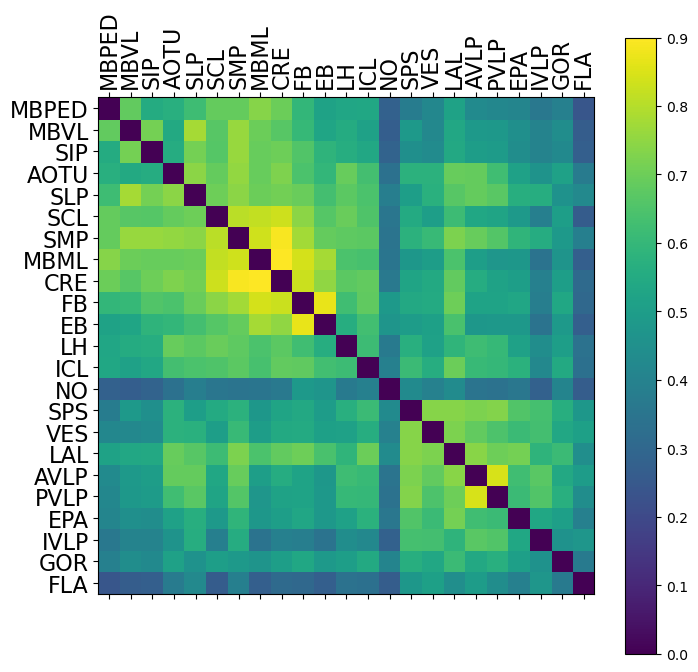

r5ht_data: (23, 23)
r5ht_names: ['MBVL', 'EB', 'FB', 'MBML', 'CRE', 'SIP', 'SMP', 'SLP', 'AOTU', 'NO', 'MBPED', 'SCL', 'LH', 'ICL', 'LAL', 'IVLP', 'VES', 'EPA', 'SPS', 'FLA', 'AVLP', 'PVLP', 'GOR']


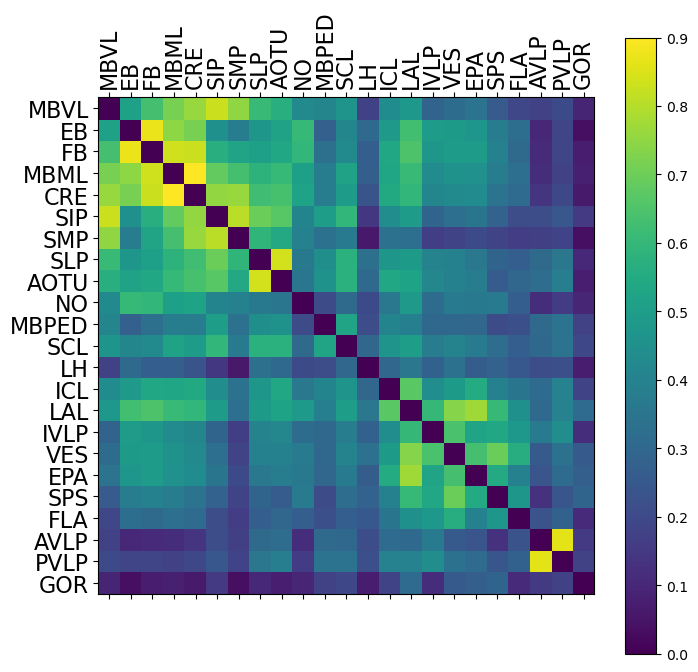

In [16]:
## output path
outpath = path + 'whole_brain_networks-Vis/'

## load G7f data
calc_path = path + 'G7f_average_Stim/'
calc_data = np.load(calc_path + 'whole_brain_all_regions_similarity_hierarchy2_ACH_5HT.npy')
print("calc_data:", calc_data.shape)
calc_ids = np.load(calc_path + "whole_brain_all_regions_similarity_hierarchy2_ACH_5HT_region.npy")
calc_names = [region_names[i] for i in calc_ids]
print("calc_names:", calc_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(calc_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(calc_data)), calc_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(calc_data)), calc_names)
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_calc.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_calc.pdf', dpi = 300, bbox_inches='tight')
plt.show()

## load ACh data
ach_path = path + 'ACh_5HT_average_Stim/'
ach_data = np.load(ach_path + 'whole_brain_all_regions_similarity_hierarchy2_ACH.npy')
print("ach_data:", ach_data.shape)
ach_ids = np.load(ach_path + "whole_brain_all_regions_similarity_hierarchy2_ACH_region.npy")
ach_names = [region_names[i] for i in ach_ids]
print("ach_names:", ach_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(ach_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(ach_data)), ach_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(ach_data)), ach_names)
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_ach.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_ach.pdf', dpi = 300, bbox_inches='tight')
plt.show()

## load 5HT data
r5ht_path = path + 'ACh_5HT_average_Stim/'
r5ht_data = np.load(r5ht_path + 'whole_brain_all_regions_similarity_hierarchy2_5HT.npy')
print("r5ht_data:", r5ht_data.shape)
r5ht_ids = np.load(r5ht_path + "whole_brain_all_regions_similarity_hierarchy2_5HT_region.npy")
r5ht_names = [region_names[i] for i in r5ht_ids]
print("r5ht_names:", r5ht_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(r5ht_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(r5ht_data)), r5ht_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(r5ht_data)), r5ht_names)
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_5ht.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_5ht.pdf', dpi = 300, bbox_inches='tight')
plt.show()


## 2) Figure S2-a

calc_data: (23, 23)
calc_names: ['ICL', 'SCL', 'MBPED', 'MBML', 'CRE', 'FB', 'EB', 'SMP', 'MBVL', 'SIP', 'AOTU', 'SLP', 'LH', 'NO', 'SPS', 'EPA', 'VES', 'LAL', 'AVLP', 'PVLP', 'IVLP', 'FLA', 'GOR']


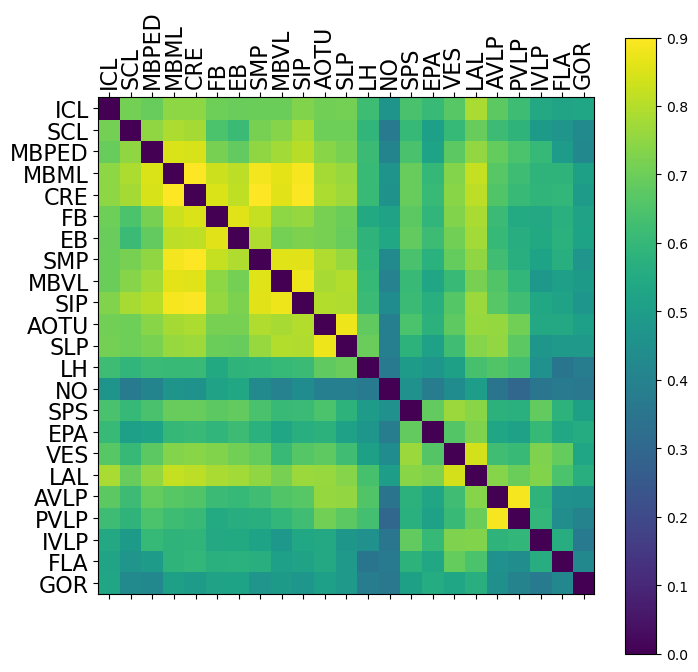

ach_data: (23, 23)
ach_names: ['MBPED', 'MBVL', 'SIP', 'AOTU', 'SLP', 'SCL', 'SMP', 'MBML', 'CRE', 'FB', 'EB', 'LH', 'ICL', 'NO', 'SPS', 'VES', 'LAL', 'AVLP', 'PVLP', 'EPA', 'IVLP', 'GOR', 'FLA']


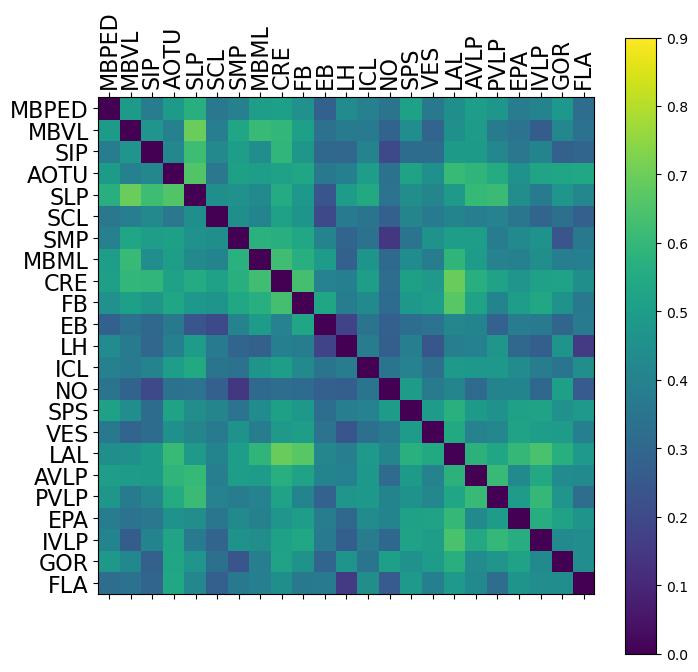

r5ht_data: (23, 23)
r5ht_names: ['MBVL', 'EB', 'FB', 'MBML', 'CRE', 'SIP', 'SMP', 'SLP', 'AOTU', 'NO', 'MBPED', 'SCL', 'LH', 'ICL', 'LAL', 'IVLP', 'VES', 'EPA', 'SPS', 'FLA', 'AVLP', 'PVLP', 'GOR']


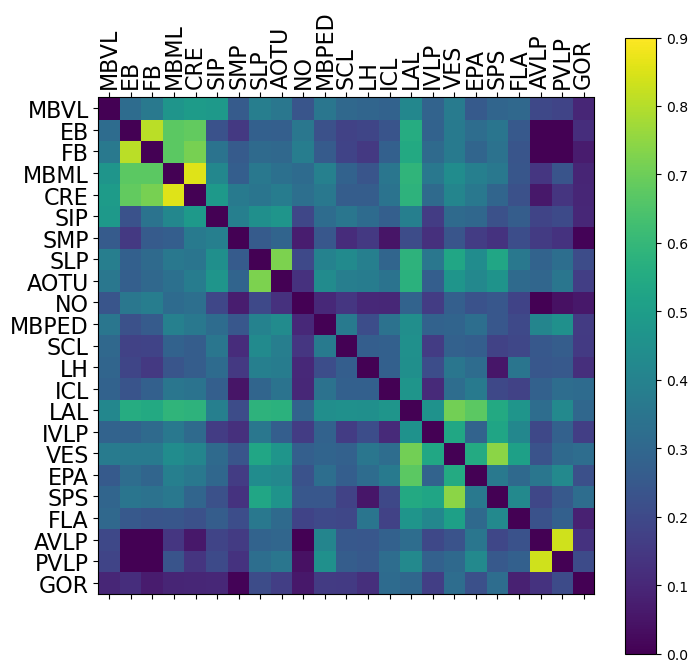

In [15]:
## output path
outpath = path + 'whole_brain_networks-Vis\\'

## load G7f data
calc_path = path + 'G7f_average_Stim\\'
calc_data = np.load(calc_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_ACH_5HT.npy')
print("calc_data:", calc_data.shape)
calc_ids = np.load(calc_path + "RS_whole_brain_all_regions_similarity_hierarchy2_ACH_5HT_region.npy")
calc_names = [region_names[i] for i in calc_ids]
print("calc_names:", calc_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(calc_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(calc_data)), calc_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(calc_data)), calc_names)
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_calc_pre.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_calc_pre.pdf', dpi = 300, bbox_inches='tight')
plt.show()

## load ACh data
ach_path = path + 'ACh_5HT_average_Stim\\'
ach_data = np.load(ach_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_ACH.npy')
print("ach_data:", ach_data.shape)
ach_ids = np.load(ach_path + "RS_whole_brain_all_regions_similarity_hierarchy2_ACH_region.npy")
ach_names = [region_names[i] for i in ach_ids]
print("ach_names:", ach_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(ach_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(ach_data)), ach_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(ach_data)), ach_names)
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_ach_pre.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_ach_pre.pdf', dpi = 300, bbox_inches='tight')
plt.show()

## load 5HT data
r5ht_path = path + 'ACh_5HT_average_Stim\\'
r5ht_data = np.load(r5ht_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_5HT.npy')
print("r5ht_data:", r5ht_data.shape)
r5ht_ids = np.load(r5ht_path + "RS_whole_brain_all_regions_similarity_hierarchy2_5HT_region.npy")
r5ht_names = [region_names[i] for i in r5ht_ids]
print("r5ht_names:", r5ht_names)

figure = plt.figure(figsize=(8,8)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(r5ht_data, interpolation ='nearest', vmin = 0, vmax = 0.9) 
figure.colorbar(caxes) 
plt.xticks(rotation = 90, fontsize = 16)
plt.xticks(range(len(r5ht_data)), r5ht_names)
plt.yticks(rotation = 0, fontsize = 16)
plt.yticks(range(len(r5ht_data)), r5ht_names)
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_5ht_pre.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'RS_whole_brain_all_regions_similarity_hierarchy_5ht_pre.pdf', dpi = 300, bbox_inches='tight')
plt.show()


## 3) Figure 2-g

output path: F:/THU/drosophila multi-probes/data_analysis_res_revision/whole_brain_networks-Vis/
pre data: 253
sti data: 253


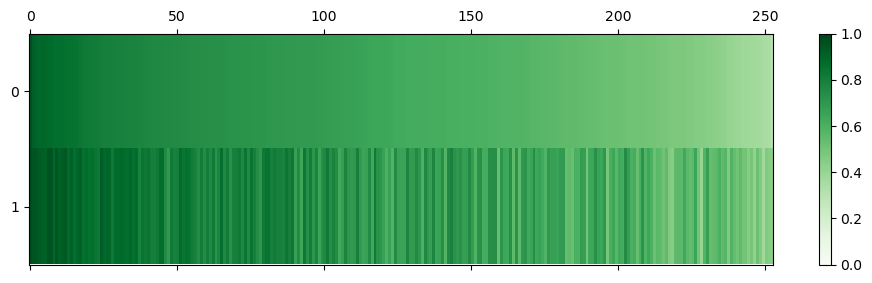

pre data: 253
sti data: 253


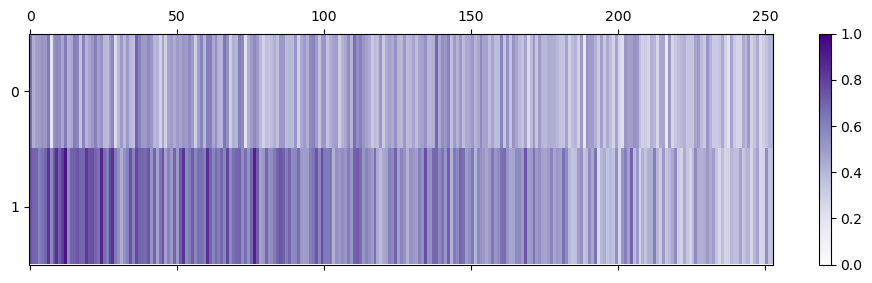

pre data: 253
sti data: 253


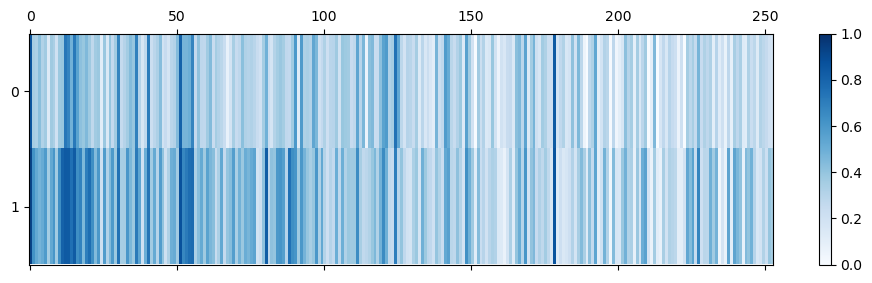

In [5]:
# output path
outpath = path + 'whole_brain_networks-Vis/'
print("output path:", outpath)

'''
G7f correlation
'''

## G7f
pre_path = path + 'G7f_average_Stim/'
pre_data = np.load(pre_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_ACH_5HT.npy')
pre_data = np.nan_to_num(pre_data)
pre_list_calc = []
for i in range(22):
    pre_list_calc.extend(pre_data[i, i + 1:23])
print("pre data:", len(pre_list_calc))

sti_path = path + 'G7f_average_Stim/'
sti_data = np.load(sti_path + 'whole_brain_all_regions_similarity_hierarchy2_ACH_5HT.npy')
sti_data = np.nan_to_num(sti_data)
sti_list_calc = []
for i in range(22):
    sti_list_calc.extend(sti_data[i, i + 1:23])
print("sti data:", len(sti_list_calc))
    
## sort indexes
sorted_index = sorted(range(len(pre_list_calc)), key = lambda k : pre_list_calc[k], reverse = True)
pre_list_calc = [pre_list_calc[i] for i in sorted_index]
sti_list_calc = [sti_list_calc[i] for i in sorted_index]
whole_list = [pre_list_calc,sti_list_calc]

## plot
figure = plt.figure(figsize=(12,3)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(whole_list, interpolation ='nearest', cmap = "Greens",aspect = 'auto', vmin = 0, vmax =1) 
figure.colorbar(caxes) 
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_calc.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_calc.pdf', dpi = 300, bbox_inches='tight')
plt.show()


'''
ACh correlation
'''

## ACh
pre_path = path + 'ACh_5HT_average_Stim/'
pre_data = np.load(pre_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_ACH.npy')
pre_data = np.nan_to_num(pre_data)
pre_list_ach = []
for i in range(22):
    pre_list_ach.extend(pre_data[i, i + 1:23])
print("pre data:", len(pre_list_ach))

sti_path = path + 'ACh_5HT_average_Stim/'
sti_data = np.load(sti_path + 'whole_brain_all_regions_similarity_hierarchy2_ACH.npy')
sti_data = np.nan_to_num(sti_data)
sti_list_ach = []
for i in range(22):
    sti_list_ach.extend(sti_data[i, i + 1:23])
print("sti data:", len(sti_list_ach))

## sort indexes
pre_list_ach = [pre_list_ach[i] for i in sorted_index]
sti_list_ach = [sti_list_ach[i] for i in sorted_index]
whole_list = [pre_list_ach,sti_list_ach]

## plot
figure = plt.figure(figsize=(12,3)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(whole_list, interpolation ='nearest', cmap = "Purples",aspect = 'auto', vmin = 0, vmax =1) 
figure.colorbar(caxes) 
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_ach.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_ach.pdf', dpi = 300, bbox_inches='tight')
plt.show()

'''
5HT correlation
'''

## 5HT
pre_path = path + 'ACh_5HT_average_Stim/'
pre_data = np.load(pre_path + 'RS_whole_brain_all_regions_similarity_hierarchy2_5HT.npy')
pre_data = np.nan_to_num(pre_data)
pre_list_5ht = []
for i in range(22):
    pre_list_5ht.extend(pre_data[i, i + 1:23])
print("pre data:", len(pre_list_5ht))

sti_path = path + 'ACh_5HT_average_Stim/'
sti_data = np.load(sti_path + 'whole_brain_all_regions_similarity_hierarchy2_5HT.npy')
sti_data = np.nan_to_num(sti_data)
sti_list_5ht = []
for i in range(22):
    sti_list_5ht.extend(sti_data[i, i + 1:23])
print("sti data:", len(sti_list_5ht))

## sort indexes
pre_list_5ht = [pre_list_5ht[i] for i in sorted_index]
sti_list_5ht = [sti_list_5ht[i] for i in sorted_index]
whole_list = [pre_list_5ht,sti_list_5ht]

## plot
figure = plt.figure(figsize=(12,3)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(whole_list, interpolation ='nearest', cmap = "Blues",aspect = 'auto', vmin = 0, vmax =1) 
figure.colorbar(caxes) 
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_5ht.png', dpi = 300, bbox_inches='tight')
plt.savefig(outpath + 'whole_brain_all_regions_similarity_matshow_5ht.pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [3]:
'''
Define the Scheirer–Ray–Hare test

The Scheirer–Ray–Hare test is a non-parameter alternative to multi-factorial ANOVA analyse.
'''

def SRH(region_pairs, stages, measure):
    data_dict = {"Pairs": region_pairs, "Stages": stages, "Measure": measure}
    data = pd.DataFrame.from_dict(data_dict)

    # Calculating the ranks
    data['rank'] = data.Measure.sort_values().rank(numeric_only = float)

    # Calculating the sum of the squares
    rows = data.groupby(['Pairs'], as_index = False).agg({'rank':['count', 'mean', 'var']}).rename(columns={'rank':'row'})
    rows.columns = ['_'.join(col) for col in rows.columns]
    rows.columns = rows.columns.str.replace(r'_$', "", regex = True)
    rows['row_mean_rows'] = rows.row_mean.mean()
    rows['sqdev'] = (rows.row_mean - rows.row_mean_rows)**2

    cols = data.groupby(['Stages'], as_index = False).agg({'rank':['count', 'mean', 'var']}).rename(columns={'rank':'col'})
    cols.columns = ['_'.join(col) for col in cols.columns]
    cols.columns = cols.columns.str.replace(r'_$', "", regex = True)
    cols['col_mean_cols'] = cols.col_mean.mean()
    cols['sqdev'] = (cols.col_mean-cols.col_mean_cols)**2

    data_sum         = data.groupby(['Pairs', 'Stages'], as_index = False).agg({'rank':['count', 'mean', 'var']})
    data_sum.columns = ['_'.join(col) for col in data_sum.columns]
    data_sum.columns = data_sum.columns.str.replace(r'_$', "", regex = True)

    nobs_row   = rows.row_count.mean()
    nobs_total = rows.row_count.sum()
    nobs_col   = cols.col_count.mean()

    Columns_SS = cols.sqdev.sum()*nobs_col
    Rows_SS    = rows.sqdev.sum()*nobs_row
    Within_SS  = data_sum.rank_var.sum()*(data_sum.rank_count.min()-1)
    MS         = data['rank'].var()
    TOTAL_SS   = MS * (nobs_total-1)
    Inter_SS   = TOTAL_SS - Within_SS - Rows_SS - Columns_SS

    # Calculating the H-statistics and degrees of freedom
    H_rows = Rows_SS/MS
    H_cols = Columns_SS/MS
    H_int  = Inter_SS/MS

    df_rows   = len(rows)-1
    df_cols   = len(cols)-1
    df_int    = df_rows*df_cols
    df_total  = len(data)-1
    df_within = df_total - df_int - df_cols - df_rows

    # Calculating the p-values
    p_rows  = round(1-stats.chi2.cdf(H_rows, df_rows),4)
    p_cols  = round(1-stats.chi2.cdf(H_cols, df_cols),4)
    p_inter = round(1-stats.chi2.cdf(H_int, df_int),4)

    print("Scheirer–Ray–Hare test p-value:", p_cols) # p-value for the given stages
    
    return p_cols

In [5]:
''' Test '''

## initialization
n_regions = len(focus_regions_0)
calc_rach_stim, calc_r5ht_stim = [], []
calc_rach_pre, calc_r5ht_pre = [], []
rach_stim, r5ht_stim = [], []
rach_pre, r5ht_pre = [], []

## process ACh flies
data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list: 
    data_df = pd.read_csv(path_inspur + 'Ach-' + data_index + '-stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            calc_rach_stim.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + 'Ach-' + data_index + '-pre_stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            calc_rach_pre.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + 'Ach-' + data_index + '-trans-stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            rach_stim.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + 'Ach-' + data_index + '-trans-pre_stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            rach_pre.append(similarity[i,j])
    
## process 5HT flies
data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list:
    data_df = pd.read_csv(path_inspur + data_index + '-stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            calc_r5ht_stim.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + data_index + '-pre_stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            calc_r5ht_pre.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + data_index + '-trans-stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            r5ht_stim.append(similarity[i,j])
            
    data_df = pd.read_csv(path_inspur + data_index + '-trans-pre_stimu\\' + "network\\regions_of_whole_brain_network_edges1.csv")
    similarity = np.zeros((n_regions,n_regions))
    for i in range(len(data_df)):
        x, y, v = data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]
        similarity[x,y] = v
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):
            r5ht_pre.append(similarity[i,j])

## labels
region_pairs = list(range(253)) * 10 * 2
stages = ["pre"] * 2530 + ["stim"] * 2530

ps_Bonferroni = []

## testing results
print(">>>> Testing between RS and Stim")
print("------- G7f RS vs G7f Stim --------")
measure = list(calc_rach_pre) + list(calc_r5ht_pre) + list(calc_rach_stim) + list(calc_r5ht_stim)
region_pairs_new = list(range(253)) * 10 * 2 * 2
stages_new = ["pre"] * 2530 * 2 + ["stim"] * 2530 * 2
p_value = SRH(region_pairs_new, stages_new, measure)
ps_Bonferroni.append(p_value)
print("------- ACh RS vs ACh Stim --------")
measure = list(rach_pre) + list(rach_stim)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)
print("------- 5HT RS vs 5HT Stim --------")
measure = list(r5ht_pre) + list(r5ht_stim)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)

print(">>>> Testing between G7f, ACh and 5HT in RS")
print("------- G7f RS vs ACh RS --------")
measure = list(calc_rach_pre) + list(rach_pre)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)
print("------- G7f RS vs 5HT RS --------")
measure = list(calc_r5ht_pre) + list(r5ht_pre)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)
print("------- ACh RS vs 5HT RS --------")
measure = list(rach_pre) + list(r5ht_pre) 
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)

print(">>>> Testing between G7f, ACh and 5HT in Stim")
print("------- G7f Stim vs ACh Stim --------")
measure = list(calc_rach_stim) + list(rach_stim)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)
print("------- G7f Stim vs 5HT Stim --------")
measure = list(calc_r5ht_stim) + list(r5ht_stim)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)
print("------- ACh Stim vs 5HT Stim --------")
measure = list(rach_stim) + list(r5ht_stim)
p_value = SRH(region_pairs, stages, measure)
ps_Bonferroni.append(p_value)


'''multi-comparison corrections'''

n = 6
ps = [i/n for i in ps_Bonferroni]
rej, ps_adj, _, _ = multipletests(ps, method = 'fdr_bh')
print("multi-comparison corrections -- p values:", ps_adj)

>>>> Testing between RS and Stim
------- G7f RS vs G7f Stim --------
Scheirer–Ray–Hare test p-value: 0.0
------- ACh RS vs ACh Stim --------
Scheirer–Ray–Hare test p-value: 0.0
------- 5HT RS vs 5HT Stim --------
Scheirer–Ray–Hare test p-value: 0.0
>>>> Testing between G7f, ACh and 5HT in RS
------- G7f RS vs ACh RS --------
Scheirer–Ray–Hare test p-value: 0.0
------- G7f RS vs 5HT RS --------
Scheirer–Ray–Hare test p-value: 0.0
------- ACh RS vs 5HT RS --------
Scheirer–Ray–Hare test p-value: 0.0
>>>> Testing between G7f, ACh and 5HT in Stim
------- G7f Stim vs ACh Stim --------
Scheirer–Ray–Hare test p-value: 0.0
------- G7f Stim vs 5HT Stim --------
Scheirer–Ray–Hare test p-value: 0.0
------- ACh Stim vs 5HT Stim --------
Scheirer–Ray–Hare test p-value: 0.0
multi-comparison corrections -- p values: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 2. Network topological properties

## 1) Figure 2-h

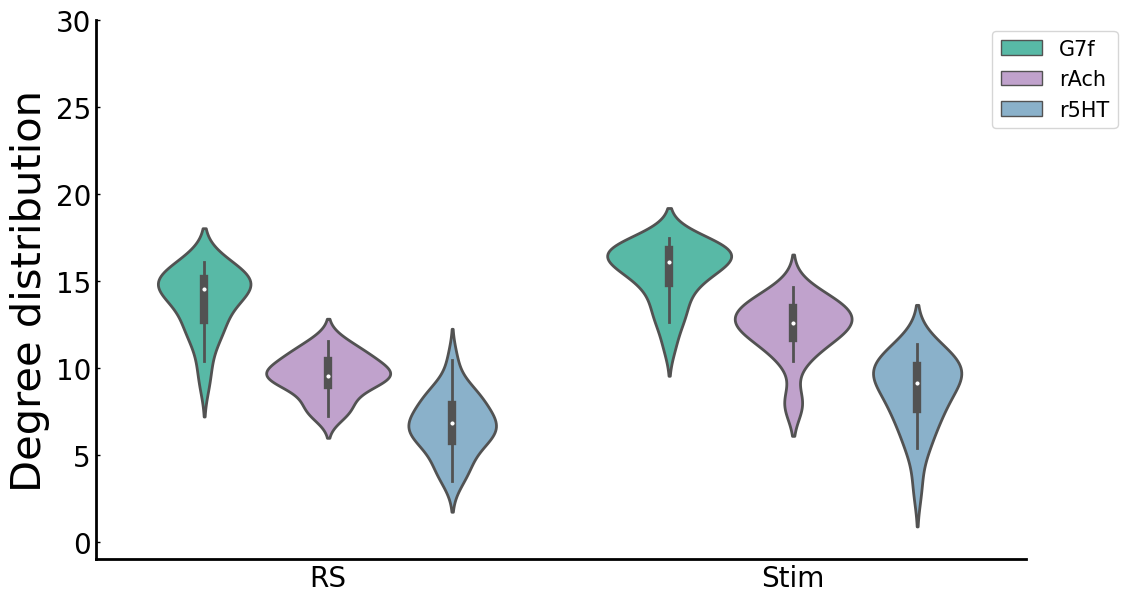

In [7]:
'''
process G7f network
'''

## RS
load_path = path + 'G7f_average_Stim\\'
data_df = pd.read_csv(load_path + 'RS_regions_of_whole_brain_network_edges1_ACH_5HT.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
for i in range(23):
    if i not in G.nodes():
        G.add_node(i)
pre_calc_nodes = list(G.nodes)
pre_calc_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

## Stim
load_path = path + 'G7f_average_Stim\\'
data_df = pd.read_csv(load_path + 'regions_of_whole_brain_network_edges1_ACH_5HT.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
for i in range(23):
    if i not in G.nodes():
        G.add_node(i)
calc_nodes = list(G.nodes)
calc_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

'''
process ACh network
'''

## RS
load_path = path + 'ACh_5HT_average_Stim\\'
data_df = pd.read_csv(load_path + 'RS_regions_of_whole_brain_network_edges1_ACH.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
if 10 not in G.nodes():
    G.add_node(10)
pre_trans_nodes = list(G.nodes)
pre_trans_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

## Stim
load_path = path + 'ACh_5HT_average_Stim\\'
data_df = pd.read_csv(load_path + 'regions_of_whole_brain_network_edges1_ACH.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
if 10 not in G.nodes():
    G.add_node(10)
trans_nodes = list(G.nodes)
trans_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

'''
process 5HT network
'''

## RS
load_path = path + 'ACh_5HT_average_Stim\\'
data_df = pd.read_csv(load_path + 'RS_regions_of_whole_brain_network_edges1_5HT.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
if 10 not in G.nodes():
    G.add_node(10)
pre_r5ht_nodes = list(G.nodes)
pre_r5ht_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

## Stim
load_path = path + 'ACh_5HT_average_Stim\\'
data_df = pd.read_csv(load_path + 'regions_of_whole_brain_network_edges1_5HT.csv')
edges = [(data_df.iloc[i,0], data_df.iloc[i,1], data_df.iloc[i,2]) for i in range(len(data_df))]
G = nx.Graph()
G.add_weighted_edges_from(edges)
if 10 not in G.nodes():
    G.add_node(10)
r5ht_nodes = list(G.nodes)
r5ht_node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]

## data and labels
stage_names = ['RS', 'Stim']
indicators = ['G7f', 'rAch', 'r5HT']

x = [stage_names[0]] * len(pre_calc_node_degrees) * 3 + [stage_names[1]] * len(calc_node_degrees) * 3 
hue = [indicators[0]] * len(pre_calc_node_degrees) + [indicators[1]] * len(pre_calc_node_degrees) + [indicators[2]] * len(pre_calc_node_degrees) 
hue += [indicators[0]] * len(pre_calc_node_degrees) + [indicators[1]] * len(pre_calc_node_degrees) + [indicators[2]] * len(pre_calc_node_degrees) 
data_flatten = list(pre_calc_node_degrees) + list(pre_trans_node_degrees) + list(pre_r5ht_node_degrees) \
                    + list(calc_node_degrees) + list(trans_node_degrees) + list(r5ht_node_degrees) 

## plot
fig,ax = plt.subplots(figsize=(12,7),dpi=100,facecolor="w")
ax = sns.violinplot(x = x, y = data_flatten, hue = hue, order = stage_names, ax = ax, palette= ["#48C9B0","#C39BD3", "#7FB3D5"],
                    width=0.8, linewidth=2, notch=False, alpha =0.3)
ax.legend(bbox_to_anchor=(0.1,0.1,1.01,0.9), fontsize = 15)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=20,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylim([-1,30])
ax.set_ylabel("Degree distribution", fontsize = 30)
plt.savefig(path+"whole_brain_networks-Vis\\degree_dist_calc_rAch_5ht_violin.png", dpi = 300, bbox_inches='tight')
plt.savefig(path+"whole_brain_networks-Vis\\degree_dist_calc_rAch_5ht_violin.pdf", dpi = 300, bbox_inches='tight')
plt.show()

In [8]:
''' Test ''' 

## parameters
alternative='two-sided'
mode='auto'

ps_Bonferroni = []

print(">>>> Testing between RS and Stim")
print("------- G7f RS vs G7f Stim --------")
stat, p_vlaue = stats.ks_2samp(pre_calc_node_degrees, calc_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- ACh RS vs ACh Stim --------")
stat, p_vlaue = stats.ks_2samp(pre_trans_node_degrees, trans_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- 5HT RS vs 5HT Stim --------")
stat, p_vlaue = stats.ks_2samp(pre_r5ht_node_degrees, r5ht_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)

print(">>>> Testing between G7f, ACh and 5HT in RS")
print("------- G7f RS vs ACh RS --------")
stat, p_vlaue = stats.ks_2samp(pre_calc_node_degrees, pre_trans_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- G7f RS vs 5HT RS --------")
stat, p_vlaue = stats.ks_2samp(pre_r5ht_node_degrees, pre_calc_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- ACh RS vs 5HT RS --------")
stat, p_vlaue = stats.ks_2samp(pre_trans_node_degrees, pre_r5ht_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)

print(">>>> Testing between G7f, ACh and 5HT in Stim")
print("------- G7f Stim vs ACh Stim --------")
stat, p_vlaue = stats.ks_2samp(calc_node_degrees, trans_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- ACh Stim vs 5HT Stim --------")
stat, p_vlaue = stats.ks_2samp(trans_node_degrees, r5ht_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
print("------- G7f Stim vs 5HT Stim --------")
stat, p_vlaue = stats.ks_2samp(r5ht_node_degrees, calc_node_degrees, alternative=alternative, mode=mode)
print("ks_2samp stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)


'''multi-comparison corrections'''

n = 6
ps = [i/n for i in ps_Bonferroni]
rej, ps_adj, _, _ = multipletests(ps, method = 'fdr_bh')
print("multi-comparison corrections -- p value:", ps_adj)

>>>> Testing between RS and Stim
------- G7f RS vs G7f Stim --------
ks_2samp stat: 0.5652173913043478  p value: 0.000990194866724344
------- ACh RS vs ACh Stim --------
ks_2samp stat: 0.782608695652174  p value: 3.3297274133976163e-07
------- 5HT RS vs 5HT Stim --------
ks_2samp stat: 0.5217391304347826  p value: 0.0032406377456433077
>>>> Testing between G7f, ACh and 5HT in RS
------- G7f RS vs ACh RS --------
ks_2samp stat: 0.8695652173913043  p value: 3.687405773419287e-09
------- G7f RS vs 5HT RS --------
ks_2samp stat: 0.9565217391304348  p value: 1.1173956889149353e-11
------- ACh RS vs 5HT RS --------
ks_2samp stat: 0.6956521739130435  p value: 1.3001792757076406e-05
>>>> Testing between G7f, ACh and 5HT in Stim
------- G7f Stim vs ACh Stim --------
ks_2samp stat: 0.782608695652174  p value: 3.3297274133976163e-07
------- ACh Stim vs 5HT Stim --------
ks_2samp stat: 0.782608695652174  p value: 3.3297274133976163e-07
------- G7f Stim vs 5HT Stim --------
ks_2samp stat: 0.9565217

## 2) Figure S2-b

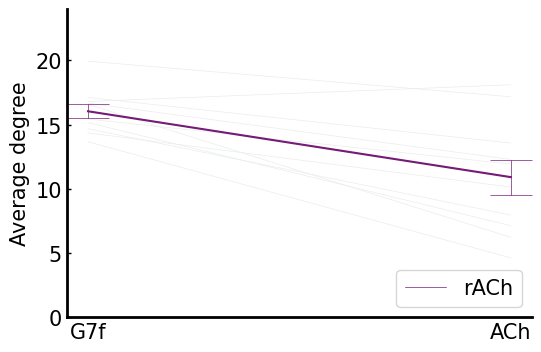

>>>> Testing between G7f and ACh in Stim
 wilcoxon stat: 1.0  p value: 0.00390625


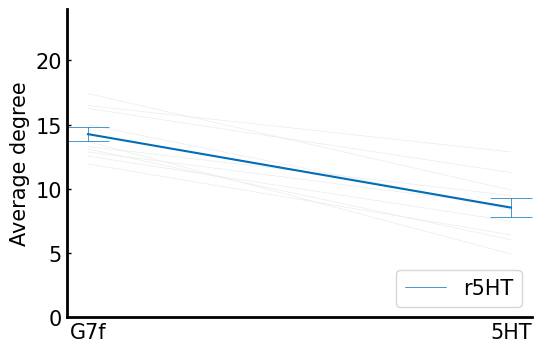

>>>> Testing between G7f and 5HT in Stim
wilcoxon stat: 0.0  p value: 0.001953125


In [12]:
## parameters
matrics = 14
name = "degree_dist"

'''
G7f vs ACh
'''

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']

calc_each = []
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])

    calc_each.append(each)


## calculate mean value and standard deviation
avg_list = []
for i in range(2):
    data = [np.mean(group[i]) for group in calc_each]
    avg_list.append(data)
avg_pair_list = []
for i in range(len(avg_list[0])):
    avg_pair_list.append([j[i] for j in avg_list])
avg, std = [], []
for i in range(2):
    avg.append(np.mean(avg_list[i]))
    std.append(np.std(avg_list[i]))
std_yy = np.array(std) / math.sqrt(10)

## plot
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
for i in avg_pair_list:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(list(range(2)), avg, yerr = std_yy, fmt = '', ecolor = '#751C77', elinewidth = 0.5, color = "#751C77", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#751C77", label = "rACh", linewidth = 0.5)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
plt.legend(loc = 4, fontsize = 15)
ax.set_ylabel("Average degree", fontsize = 15)
plt.xticks([0, 1], ["G7f", "ACh"])
ax.set_ylim([0,24])
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_" + name +"_avg_sti-calc-ach.pdf", dpi = 300, bbox_inches='tight')
plt.show()

'''
Test
'''
print(">>>> Testing between G7f and ACh in Stim")
stat, p_vlaue = stats.wilcoxon(avg_list[0], avg_list[1],alternative = 'two-sided', correction = True)
print(" wilcoxon stat:", stat, " p value:", p_vlaue)


'''
G7f vs 5HT
'''

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

calc_each = []
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + data_index + '-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + data_index + '-trans-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    calc_each.append(each)

## calculate mean value and standard deviation
avg_list = []
for i in range(2):
    data = [np.mean(group[i]) for group in calc_each]
    avg_list.append(data)
avg_pair_list = []
for i in range(len(avg_list[0])):
    avg_pair_list.append([j[i] for j in avg_list])
avg = []
std = []
for i in range(2):
    avg.append(np.mean(avg_list[i]))
    std.append(np.std(avg_list[i]))
std_yy = np.array(std) / math.sqrt(10)

## plot
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
for i in avg_pair_list:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(list(range(2)), avg, yerr = std_yy, fmt = '', ecolor = '#036EB8', elinewidth = 0.5, color = "#036EB8", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#036EB8", label = "r5HT", linewidth = 0.5)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
plt.legend(loc = 4, fontsize = 15)
ax.set_ylim([0,24])
ax.set_ylabel("Average degree", fontsize = 15)
plt.xticks([0, 1], ["G7f", "5HT"])
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_" + name +"_avg_sti-calc-5ht.pdf", dpi = 300, bbox_inches='tight')
plt.show()

'''
Test
''' 
print(">>>> Testing between G7f and 5HT in Stim")
stat, p_vlaue = stats.wilcoxon(avg_list[0], avg_list[1],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)

## 3) Figure S2-d & S2-e

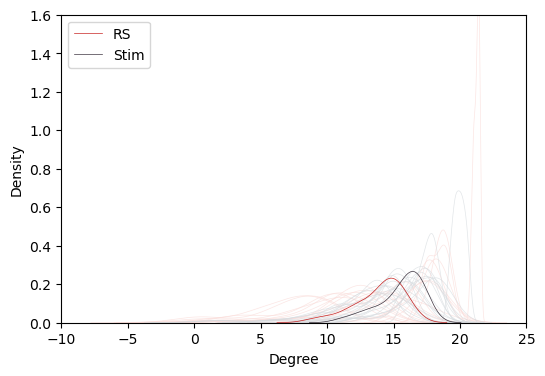

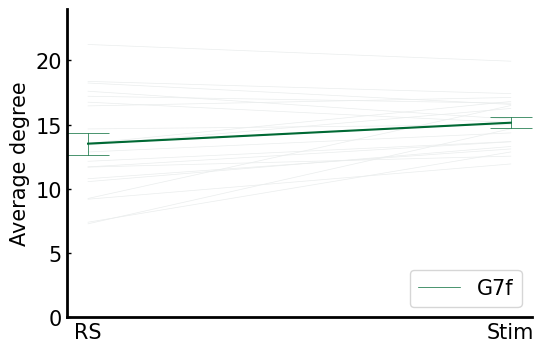

>>>> Testing G7f between RS and Stim
wilcoxon stat: 44.0  p value: 0.021484375


In [13]:
## parameters
matrics = 14
name = "degree_dist"

## load data
calc_each = []

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-pre_stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + 'Ach-' + data_index + '-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])

    calc_each.append(each)
    
data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + data_index + '-pre_stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + data_index + '-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    calc_each.append(each)

## plot distribution
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in calc_each:
    sns.kdeplot(i[0], color = "#FADBD8",linewidth = 0.5, alpha = 0.7)
for i in calc_each:
    sns.kdeplot(i[1], color = "#D6DBDF",linewidth = 0.5, alpha = 0.7)
sns.kdeplot(pre_calc_node_degrees, label = "RS", color = '#C82423',linewidth = 0.5)
sns.kdeplot(calc_node_degrees, label = "Stim", color = '#3E3540',linewidth = 0.5)
plt.legend()
plt.ylim(0,1.6)
plt.xlim(-10,25)
ax.set_xlabel("Degree", fontsize = 10)
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_dist_" + name +"_calc20.pdf", dpi = 300, bbox_inches='tight')
plt.show()


## plot mean values
avg_list = []
for i in range(2):
    data = [np.mean(group[i]) for group in calc_each]
    avg_list.append(data)
avg_pair_list = []
for i in range(len(avg_list[0])):
    avg_pair_list.append([j[i] for j in avg_list])
avg = []
std = []
for i in range(2):
    avg.append(np.mean(avg_list[i]))
    std.append(np.std(avg_list[i]))
std_yy = np.array(std) / math.sqrt(20)

fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
for i in avg_pair_list:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(list(range(2)), avg, yerr = std_yy, fmt = '', ecolor = '#006934', elinewidth = 0.5, color = "#006934", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#006934", label = "G7f", linewidth = 0.5)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
plt.legend(loc = 4, fontsize = 15)
ax.set_ylim([0,24])
ax.set_ylabel("Average degree", fontsize = 15)
plt.xticks([0, 1], ["RS", "Stim"])
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_" + name +"_avg_calc20.pdf", dpi = 300, bbox_inches='tight')
plt.show()

'''
Test
''' 
print(">>>> Testing G7f between RS and Stim")
stat, p_vlaue = stats.wilcoxon(avg_list[0], avg_list[1],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)

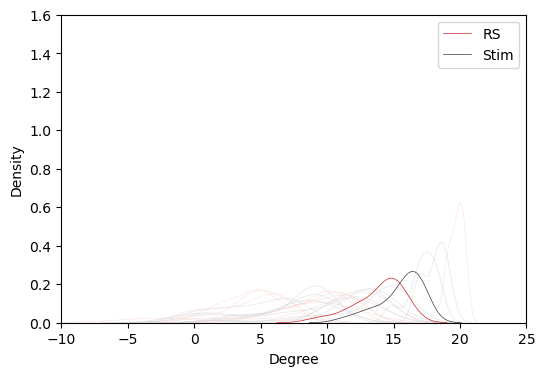

2 2 [8.898270051759834, 10.91033360248447] [1.38473764 1.36474213]


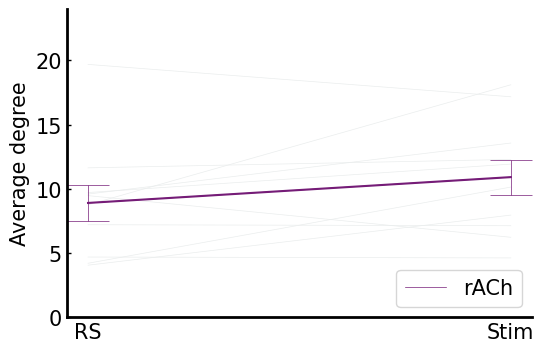

>>>> Testing ACh between RS and Stim
wilcoxon stat: 14.0  p value: 0.0966796875


In [14]:
## parameters
matrics = 14
name = "degree_dist"

## load data
calc_each = []

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-pre_stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])

    calc_each.append(each)

## plot distribution
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in calc_each:
    sns.kdeplot(i[0], color = "#FADBD8",linewidth = 0.5, alpha = 0.7)
for i in calc_each:
    sns.kdeplot(i[1], color = "#D6DBDF",linewidth = 0.5, alpha = 0.7)
sns.kdeplot(pre_calc_node_degrees, label = "RS", color = '#C82423',linewidth = 0.5)
sns.kdeplot(calc_node_degrees, label = "Stim", color = '#3E3540',linewidth = 0.5)
plt.legend()
plt.ylim(0,1.6)
plt.xlim(-10,25)
ax.set_xlabel("Degree", fontsize = 10)
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_dist_" + name +"_ach.pdf", dpi = 300, bbox_inches='tight')
plt.show()


## plot mean values
avg_list = []
for i in range(2):
    data = [np.mean(group[i]) for group in calc_each]
    avg_list.append(data)
avg_pair_list = []
for i in range(len(avg_list[0])):
    avg_pair_list.append([j[i] for j in avg_list])
avg = []
std = []
for i in range(2):
    avg.append(np.mean(avg_list[i]))
    std.append(np.std(avg_list[i]))
std_yy = np.array(std) / math.sqrt(10)
print(len(avg), len(std_yy), avg, std_yy)
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
for i in avg_pair_list:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(list(range(2)), avg, yerr = std_yy, fmt = '', ecolor = '#751C77', elinewidth = 0.5, color = "#751C77", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#751C77", label = "rACh", linewidth = 0.5)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
plt.legend(loc = 4, fontsize = 15)
ax.set_ylim([0,24])
ax.set_ylabel("Average degree", fontsize = 15)
plt.xticks([0, 1], ["RS", "Stim"])
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_" + name +"_avg_ach.pdf", dpi = 300, bbox_inches='tight')
plt.show()

'''
Test
''' 
print(">>>> Testing ACh between RS and Stim")
stat, p_vlaue = stats.wilcoxon(avg_list[0], avg_list[1],alternative = 'less', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)



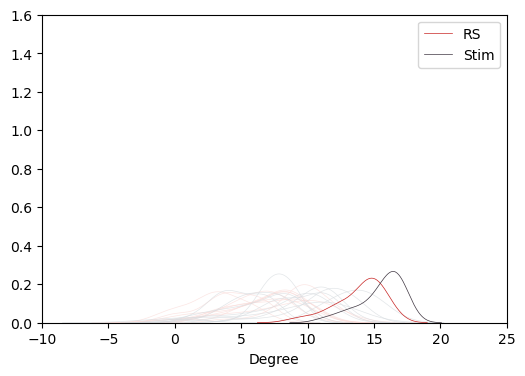

2 2 [6.552506559382645, 8.537728449087144] [0.55484198 0.73506022]


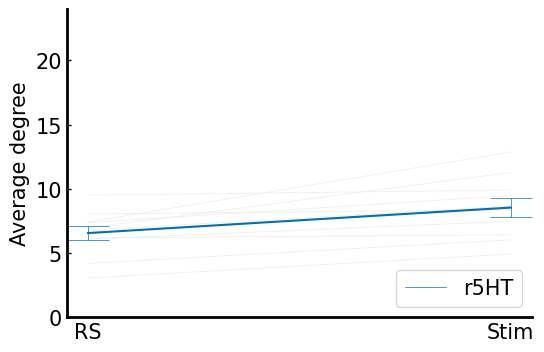

>>>> Testing ACh between RS and Stim
wilcoxon stat: 0.0  p value: 0.001953125


In [15]:
## parameters
matrics = 14
name = "degree_dist"

## load data
calc_each = []

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list:
    each = []
    
    ori_path = path_inspur + data_index + '-trans-pre_stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    ori_path = path_inspur + data_index + '-trans-stimu\\'
    data_load = pd.read_excel(ori_path + 'network_stat\\regions_of_whole_brain_network_edges1_stat.xlsx')
    sti = data_load.iloc[matrics,1]
    each.append([float(i) for i in sti[1:-1].split(', ') if len(i) > 0])
    
    calc_each.append(each)

## plot distribution
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in calc_each:
    sns.kdeplot(i[0], color = "#FADBD8",linewidth = 0.5, alpha = 0.7)
for i in calc_each:
    sns.kdeplot(i[1], color = "#D6DBDF",linewidth = 0.5, alpha = 0.7)
sns.kdeplot(pre_calc_node_degrees, label = "RS", color = '#C82423',linewidth = 0.5)
sns.kdeplot(calc_node_degrees, label = "Stim", color = '#3E3540',linewidth = 0.5)
plt.ylabel("")
plt.legend()
plt.ylim(0,1.6)
plt.xlim(-10,25)
ax.set_xlabel("Degree", fontsize = 10)
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_dist_" + name +"_5ht.pdf", dpi = 300, bbox_inches='tight')
plt.show()

## plot mean values
avg_list = []
for i in range(2):
    data = [np.mean(group[i]) for group in calc_each]
    avg_list.append(data)
avg_pair_list = []
for i in range(len(avg_list[0])):
    avg_pair_list.append([j[i] for j in avg_list])
avg = []
std = []
for i in range(2):
    avg.append(np.mean(avg_list[i]))
    std.append(np.std(avg_list[i]))
std_yy = np.array(std) / math.sqrt(10)
print(len(avg), len(std_yy), avg, std_yy)
fig,ax = plt.subplots(figsize=(6,4),dpi=100,facecolor="w")
for i in avg_pair_list:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(list(range(2)), avg, yerr = std_yy, fmt = '', ecolor = '#036EB8', elinewidth = 0.5, color = "#036EB8", capsize = 15, capthick = 0.5)
plt.plot(avg, color = "#036EB8", label = "r5HT", linewidth = 0.5)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
plt.legend(loc = 4, fontsize = 15)
ax.set_ylim([0,24])
ax.set_ylabel("Average degree", fontsize = 15)
plt.xticks([0, 1], ["RS", "Stim"])
plt.savefig(path+"whole_brain_networks-Vis\\whole_network_" + name +"_avg_5ht.pdf", dpi = 300, bbox_inches='tight')
plt.show()

'''
Test
''' 
print(">>>> Testing ACh between RS and Stim")
stat, p_vlaue = stats.wilcoxon(avg_list[0], avg_list[1],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)




# 3. Community ratio

## 1) Figure 2-i

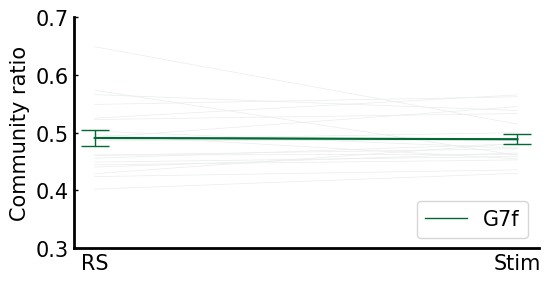

>>>> Testing G7f between RS and Stim
Wilcoxon stat: 82.0  p value: 0.40909767150878906


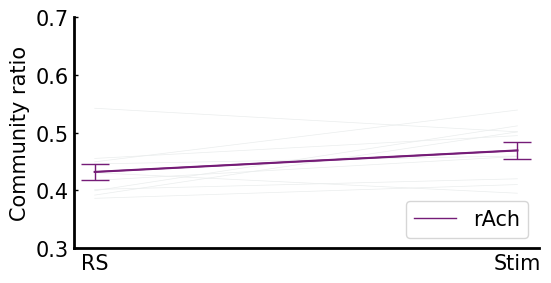

>>>> Testing ACh between RS and Stim
Wilcoxon stat: 10.0  p value: 0.0419921875


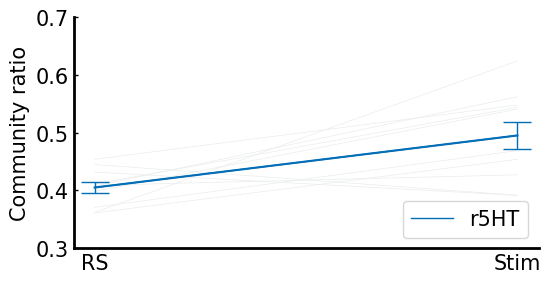

>>>> Testing 5HT between RS and Stim
Wilcoxon stat: 5.0  p value: 0.009765625


In [14]:
## the detected communities
calc_louvain_comm_main = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
ach_louvain_comm_main =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14]
r5ht_louvain_comm_main = [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 14]
trace_names = ["RS", "Stim"]


'''
G7f
'''

modularity_calc_total = []

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                   '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list:  
    line_list = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main or data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    ori_path = path_inspur + 'Ach-' + data_index + '-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main or data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    modularity_calc_total.append(line_list)
    
data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list:  
    line_list = []
    
    ori_path = path_inspur + data_index + '-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main or data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    ori_path = path_inspur + data_index + '-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main or data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    modularity_calc_total.append(line_list)
    
## plot
avg = np.mean(modularity_calc_total, axis = 0)
std = np.std(modularity_calc_total, axis = 0)
std_yy = std / math.sqrt(20)
plt.figure(figsize=(6,3),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in modularity_calc_total:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(trace_names, avg, yerr = std_yy, fmt = '', ecolor = '#006934', elinewidth = 1, color = "#006934", capsize = 10)
plt.plot(avg, color = "#006934", linewidth = 1, label = 'G7f')
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Community ratio", fontsize= 15)
plt.xticks([0, 1], ["RS", "Stim"])
ax.set_ylim([0.3,0.7])
plt.legend(fontsize = 15, loc = 4)
plt.savefig(path+"whole_brain_networks-Vis\\comm_ratio_calc.pdf",  dpi = 300, bbox_inches='tight')
plt.show()

## Test
print(">>>> Testing G7f between RS and Stim")
pre_list = [i[0] for i in modularity_calc_total]
sti_list = [i[1] for i in modularity_calc_total]
stat, p_vlaue = wilcoxon(pre_list, sti_list,correction=True,alternative = 'two-sided')
print("Wilcoxon stat:", stat, " p value:", p_vlaue)

'''
ACh
'''

modularity_ach_total = []

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                   '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list:
    line_list = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in ach_louvain_comm_main and data_df.iloc[i,1] in ach_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in ach_louvain_comm_main or data_df.iloc[i,1] in ach_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in ach_louvain_comm_main and data_df.iloc[i,1] in ach_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in ach_louvain_comm_main or data_df.iloc[i,1] in ach_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    modularity_ach_total.append(line_list)

# plot
avg = np.mean(modularity_ach_total, axis = 0)
std = np.std(modularity_ach_total, axis = 0)
std_yy = std / math.sqrt(10)  
plt.figure(figsize=(6,3),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in modularity_ach_total:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(trace_names, avg, yerr = std_yy, fmt = '', ecolor = '#751C77', elinewidth = 1, color = "#751C77", capsize = 10)
plt.plot(avg, color = "#751C77", linewidth = 1, label = 'rAch')
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Community ratio", fontsize= 15)
plt.xticks([0, 1], ["RS", "Stim"])
ax.set_ylim([0.3,0.7])
plt.legend(loc = 4, fontsize = 15)
plt.savefig(path+"whole_brain_networks-Vis\\comm_ratio_rAch.pdf",  dpi = 300, bbox_inches='tight')
plt.show()

## Test
print(">>>> Testing ACh between RS and Stim")
pre_list = [i[0] for i in modularity_ach_total]
sti_list = [i[1] for i in modularity_ach_total]
stat, p_vlaue = wilcoxon(pre_list, sti_list,correction=True,alternative = 'two-sided')
print("Wilcoxon stat:", stat, " p value:", p_vlaue)


'''
5HT
'''

modularity_5ht_total = []

data_index_list1 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list1:
    line_list = []
    
    ori_path = path_inspur + data_index + '-trans-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in r5ht_louvain_comm_main and data_df.iloc[i,1] in r5ht_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in r5ht_louvain_comm_main or data_df.iloc[i,1] in r5ht_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)  
    
    ori_path = path_inspur + data_index + '-trans-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in r5ht_louvain_comm_main and data_df.iloc[i,1] in r5ht_louvain_comm_main]
    sum_degree_sub = np.sum(sub_degrees)
    sub_degrees_non = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in r5ht_louvain_comm_main or data_df.iloc[i,1] in r5ht_louvain_comm_main]
    sum_degree_sub_non = np.sum(sub_degrees_non)
    ratio = sum_degree_sub / sum_degree_sub_non
    line_list.append(ratio)
    
    modularity_5ht_total.append(line_list)

## plot 
avg = np.mean(modularity_5ht_total, axis = 0)
std = np.std(modularity_5ht_total, axis = 0)
std_yy = std / math.sqrt(10)  
plt.figure(figsize=(6,3),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
for i in modularity_5ht_total:
    plt.plot(i, color = "#EAEDED", linewidth = 0.5)
plt.errorbar(trace_names, avg, yerr = std_yy, fmt = '', ecolor = '#036EB8', elinewidth = 1, color = "#036EB8", capsize = 10)
plt.plot(avg, color = "#036EB8", linewidth = 1, label = 'r5HT')
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Community ratio", fontsize= 15)
plt.xticks([0, 1], ["RS", "Stim"])
ax.set_ylim([0.3,0.7])
plt.legend(loc = 4, fontsize = 15)
plt.savefig(path+"whole_brain_networks-Vis\\comm_ratio_r5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()

## Test
print(">>>> Testing 5HT between RS and Stim")
pre_list = [i[0] for i in modularity_5ht_total]
sti_list = [i[1] for i in modularity_5ht_total]
stat, p_vlaue = wilcoxon(pre_list, sti_list,correction=True,alternative = 'two-sided')
print("Wilcoxon stat:", stat, " p value:", p_vlaue)

## 2) Figure S2-c

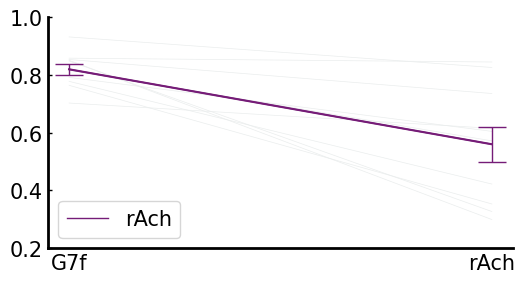

>>>> Testing between G7f and ACh
Wilcoxon stat: 0.0  p value: 0.001953125


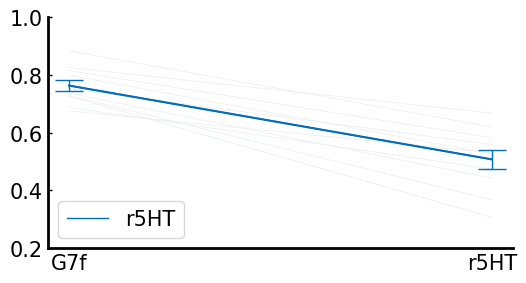

>>>> Testing between G7f and 5HT
Wilcoxon stat: 0.0  p value: 0.001953125


In [12]:
'''
G7f vs ACh
'''

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                   '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']

modularity_calc_total = []
for data_index in data_index_list:  
    line_list = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio = sum_degree_sub 
    line_list.append(ratio)
    
    ori_path = path_inspur + 'Ach-' + data_index + '-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub 
    line_list.append(ratio)
    
    modularity_calc_total.append(line_list)

modularity_ach_total = []
for data_index in data_index_list:
    line_list = []
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub
    line_list.append(ratio)
    
    ori_path = path_inspur + 'Ach-' + data_index + '-trans-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub
    line_list.append(ratio)
    
    modularity_ach_total.append(line_list)

## calculate mean values and standard deviation
sti_avg = [np.mean(modularity_calc_total, axis = 0)[1],np.mean(modularity_ach_total, axis = 0)[1]]
sti_std = [np.std(modularity_calc_total, axis = 0)[1] / math.sqrt(10),np.std(modularity_ach_total, axis = 0)[1] / math.sqrt(10)]

## plot
plt.figure(figsize=(6,3),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
sti_calc = []
sti_ach = []
for i in range(len(modularity_ach_total)):
    data = [modularity_calc_total[i][1], modularity_ach_total[i][1]]
    plt.plot(data, color = "#EAEDED", linewidth = 0.5)
    sti_calc.append(modularity_calc_total[i][1])
    sti_ach.append(modularity_ach_total[i][1])
plt.errorbar(["G7f", "rAch"], sti_avg, yerr = sti_std, fmt = '', ecolor = '#751C77', elinewidth = 1, color = "#751C77", capsize = 10)
plt.plot(sti_avg, color = "#751C77", linewidth = 1, label = 'rAch')
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylim([0.2,1])
plt.legend(loc = 3, fontsize = 15)
plt.savefig(path+"whole_brain_networks-Vis\\comm_ratio_sti-calc-rAch.pdf",  dpi = 300, bbox_inches='tight')
plt.show()
    
## Test
print(">>>> Testing between G7f and ACh")
stat, p_vlaue = wilcoxon(sti_calc, sti_ach,correction=True,alternative = 'two-sided')
print("Wilcoxon stat:", stat, " p value:", p_vlaue)

'''
G7f vs 5HT
'''

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                   '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                   '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

modularity_calc_total = []
for data_index in data_index_list:  
    line_list = []
    
    ori_path = path_inspur + data_index + '-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub 
    line_list.append(ratio)
    
    ori_path = path_inspur + data_index + '-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub 
    line_list.append(ratio)
    
    modularity_calc_total.append(line_list)

modularity_5ht_total = []
for data_index in data_index_list:
    line_list = []
    
    ori_path = path_inspur + data_index + '-trans-pre_stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub 
    line_list.append(ratio)  
    
    ori_path = path_inspur + data_index + '-trans-stimu\\'
    data_df = pd.read_csv(ori_path + 'network\\regions_of_whole_brain_network_edges1.csv')
    sub_degrees = [max(data_df.iloc[i,2],0) for i in range(len(data_df)) if data_df.iloc[i,0] in calc_louvain_comm_main and data_df.iloc[i,1] in calc_louvain_comm_main]
    sum_degree_sub = np.mean(sub_degrees)
    ratio =  sum_degree_sub 
    line_list.append(ratio)
    
    modularity_5ht_total.append(line_list)

sti_avg = [np.mean(modularity_calc_total, axis = 0)[1],np.mean(modularity_5ht_total, axis = 0)[1]]
sti_std = [np.std(modularity_calc_total, axis = 0)[1] / math.sqrt(10),np.std(modularity_5ht_total, axis = 0)[1] / math.sqrt(10)]

## plot
plt.figure(figsize=(6,3),dpi=100,facecolor="w")
ax = plt.subplot(1,1,1)
sti_calc, sti_ach = [], []
for i in range(len(modularity_5ht_total)):
    data = [modularity_calc_total[i][1], modularity_5ht_total[i][1]]
    plt.plot(data, color = "#EAEDED", linewidth = 0.5)
    sti_calc.append(modularity_calc_total[i][1])
    sti_ach.append(modularity_5ht_total[i][1])
plt.errorbar(["G7f", "r5HT"], sti_avg, yerr = sti_std, fmt = '', ecolor = '#036EB8', elinewidth = 1, color = "#036EB8", capsize = 10)
plt.plot(sti_avg, color = "#036EB8", linewidth = 1, label = 'r5HT')
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=15,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylim([0.2,1])
plt.legend(loc = 3, fontsize = 15)
plt.savefig(path+"whole_brain_networks-Vis\\comm_ratio_sti-calc-r5ht.pdf",  dpi = 300, bbox_inches='tight')
plt.show()
    
## Test
print(">>>> Testing between G7f and 5HT")
stat, p_vlaue = wilcoxon(sti_calc, sti_ach,correction=True,alternative = 'two-sided')
print("Wilcoxon stat:", stat, " p value:", p_vlaue)
